In [95]:
import argparse
import glob
import numpy as np
import re
import matplotlib.image as img
from scipy import misc
import matplotlib.pyplot as plt
import skimage.transform
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals
from os.path import basename as b
from scipy.io import loadmat

In [111]:
def prepare_image(original_image_path):
    image = misc.imread(original_image_path)
    # scale the image to 227*227
    scaled_image = misc.imresize(image, (227, 227), interp='bicubic')
    return scaled_image, image.shape[0], image.shape[1]

In [112]:
def scale_label(label, original_height, original_width):
    label[0, :] *= (227 / float(original_width))
    label[1,:] *= (227 / float(original_height))
    return label

In [113]:
def generate_dataset(image_paths,labels,dataset):
    num_examples = image_paths.shape[0]
    image_list = []
    label_list = []
    print('Start to process '+ dataset + ' dataset')
    for index in range(num_examples):
        image, or_height, or_width = prepare_image(image_paths[index])
        image_list.append(image)
        label = scale_label(labels[index], or_height, or_width)
        label_list.append(label)
    print('Done processing the ' + dataset + ' dataset')
    return image_list,label_list

In [114]:
def getLSPDataset(train_set_ratio=0.8,validation_set_ratio = 0.1):
    print('Resizing and packing images and labels to lists.\n')
    np.random.seed(1701)  # to fix test set
    # load the dataset. Make sure you put the joints.mat in the same folder as this .ipynb or .py program
    # otherwise you can change the path here
    joints = loadmat('joints.mat')
    # transpose the shape to N*C*number of features, in this case it is 2000*3*14
    joints = joints['joints'].transpose(2, 0, 1)
    
    # I saw some code such as this one: https://github.com/samitok/deeppose/blob/master/Codes/Original/GetLSPData.py only extracts two joints
    # which is Right ankle and Right knee
    # this one as well: https://github.com/mitmul/deeppose/blob/master/datasets/lsp_dataset.py
    # invisible_joints = joints[:, :, 2] < 0.5
    # joints[invisible_joints] = 0
    # joints = joints[..., :2]
    
    # get the list of images names. Make sure you put the images directory in the same folder as this .ipynb or .py program
    # otherwise you can change the path here
    image_list = np.asarray(sorted(glob.glob('./images/*.jpg')))
    
    # get image indexes
    image_indexes = list(range(0, len(image_list)))
    
    # random shuffle the data
    # shuffle the index and use the indexes to select images. So it is equivalent to shuffle images
    np.random.shuffle(image_indexes)
   
    # get the training, val and test set indexes
    train_validation_split = int(len(image_list)*train_set_ratio)
    validation_test_split = int(len(image_list)*(train_set_ratio+validation_set_ratio))
    train_indexes = np.asarray(image_indexes[:train_validation_split])
    validation_indexes = np.asarray(image_indexes[train_validation_split:validation_test_split])
    test_indexes = np.asarray(image_indexes[validation_test_split:])

    # generate label
    train_list,train_label = generate_dataset(image_list[train_indexes],joints[train_indexes],'training')
    val_list,val_label = generate_dataset(image_list[validation_indexes],joints[validation_indexes],'validation')
    test_list,test_label = generate_dataset(image_list[test_indexes],joints[test_indexes],'test')
    
    return train_list,train_label,val_list,val_label,test_list,test_label

In [115]:
#train_list,train_label,val_list,val_label,test_list,test_label = getLSPDataset()

Resizing and packing images and labels to lists.

Start to process training dataset
Done processing the training dataset
Start to process validation dataset
Done processing the validation dataset
Start to process test dataset
Done processing the test dataset


In [2]:
# not useful, just for testing implementation purpose

In [5]:
np.random.seed(1701)
joints = loadmat('joints.mat')
joints = joints['joints'].transpose(2, 0, 1)

In [8]:
N_test = int(len(joints) * 0.1)

In [9]:
perm = np.random.permutation(int(len(joints)))[:N_test].tolist()

In [13]:
fp_train = open('./train_joints.csv', 'w')
fp_test = open('./test_joints.csv' , 'w')
for img_fn in sorted(glob.glob('./images/*.jpg')):
    index = int(re.search('im([0-9]+)', b(img_fn)).groups()[0]) - 1
    str_j = [str(j) if j > 0 else '-1'
              for j in joints[index].flatten().tolist()]
    out_list = [b(img_fn)]
    out_list.extend(str_j)
    out_str = ','.join(out_list)
    if index in perm:
        print(out_str, file=fp_test)
    else:
        print(out_str, file=fp_train)

fp_train.close()
fp_test.close()

In [25]:
print(joints[0].flatten())

[  29.74645941   30.5501068    28.94281202   43.00664135   42.20299396
   42.60481765   24.52275137   15.28080638   24.12092767   50.64129155
   52.65041003   53.85588112   38.184757     38.9884044   143.34544031
  117.22690013   84.67918082   85.08100452  111.1995447   132.89802424
   52.9351089    62.98070128   42.08586913   44.09498761   58.96246433
   58.96246433   36.05851371   15.56550525    0.            0.            0.
    0.            0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.        ]


In [4]:
image = img.imread('./images/im0001.jpg')

In [5]:
print(image.shape)

(160, 70, 3)


In [7]:
face = misc.imread('./images/im0001.jpg')

In [8]:
print(face.shape)

(160, 70, 3)


In [24]:
plt.imshow(face)
h,w,c = face.shape
x = skimage.transform.resize(face, (227, 227),mode='reflect')
plt.imshow(x)

In [18]:
print(x.shape)

(227, 227, 3)


In [22]:
plt.imshow(x)

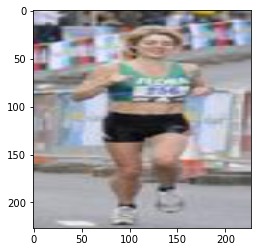

In [25]:
plt.show()